In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib widget
from ipywidgets import interact

# Metallic waveguide

In [2]:
d = 1

eps = lambda w: 3
ky = lambda m: m * np.pi / d
kz = lambda m, w: np.sqrt(w**2 * eps(w) - ky(m)**2)

y = np.linspace(-d/2, d/2, 50).reshape(-1, 1)
z = np.linspace(0, 5, 100).reshape(1, -1)

def u(m):
    if m % 2 == 0:
        return np.sin(ky(m) * y)
    return np.cos(ky(m) * y)

def E_p(m, w, t=0, phi=0):
    return u(m) * np.cos(kz(m, w) * z - w * t + phi)

def E_m(m, w, t=0, phi=0):
    return u(m) * np.cos(-kz(m, w) * z - w * t + phi)



## Single-mode function

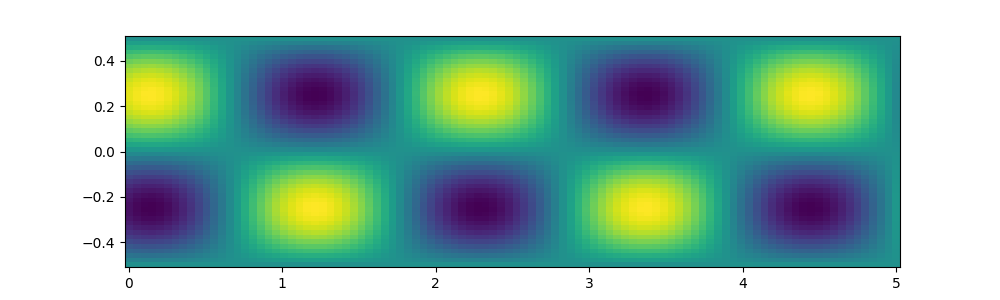

In [3]:
fig = plt.figure(figsize=(10, 3))

plt.pcolormesh(z, y, E_p(2, 4, 0.1))

## Single-mode propagation

interactive(children=(FloatSlider(value=0.0, description='t', max=3.0, step=0.01), Output()), _dom_classes=('w…

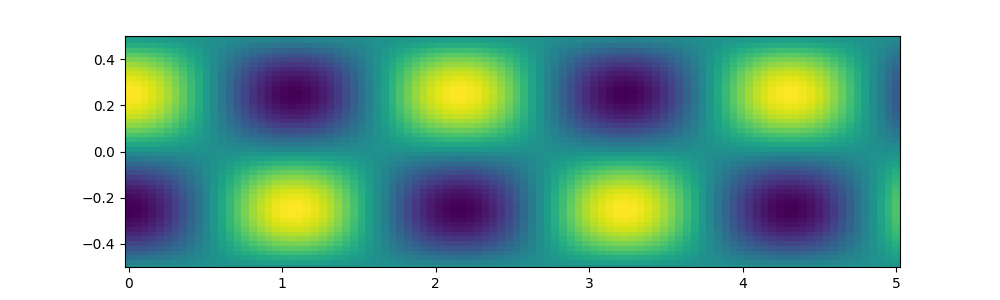

In [4]:
fig, ax = plt.subplots(1, figsize=(10, 3))
mesh_1mode = ax.pcolormesh(z, y, E_p(2, 4, 0), 
                           alpha=1)
ax.set_ylim(-d/2, d/2)

@interact(t=(0, 3, 0.01))
def time_evol(t=0):
    mesh_1mode.set_array(E_p(2, 4, t).ravel())
    plt.draw()

## Multi-mode propagation

interactive(children=(FloatSlider(value=0.0, description='t', max=3.0, step=0.01), Output()), _dom_classes=('w…

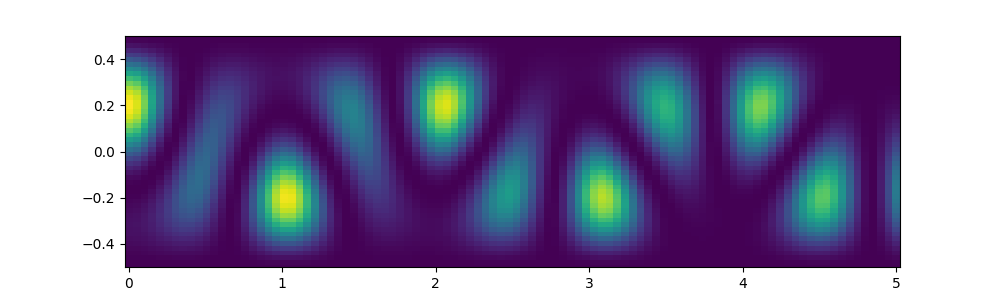

In [5]:
fig, ax = plt.subplots(1, figsize=(10, 3))
mesh_2modes = ax.pcolormesh(z, y, np.abs(E_p(1, 4, 0) + E_p(2, 4, 0))**2, 
                           alpha=1)
ax.set_ylim(-d/2, d/2)

@interact(t=(0, 3, 0.01))
def time_evol(t=0):
    mesh_2modes.set_array(np.abs(E_p(1, 4, 0) + E_p(2, 4, t)).ravel()**2)
    plt.draw()

interactive(children=(FloatSlider(value=0.0, description='t', max=9.0, step=0.01), Output()), _dom_classes=('w…

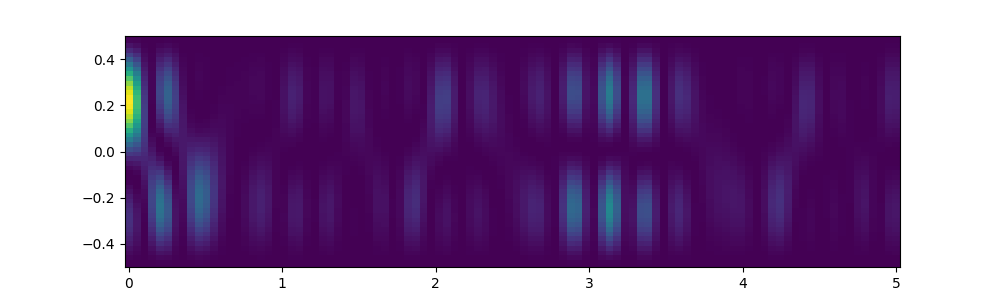

In [6]:
fig, ax = plt.subplots(1, figsize=(10, 3))

c = np.random.rand(M:=3, W:=5)

E_rand = lambda t: sum(c[m, iw] * E_p(m, w, t) for m in range(M) 
                       for iw, w in enumerate(np.linspace(m * np.pi/d, 5*m * np.pi/d/eps(0), W)))

mesh_multi = ax.pcolormesh(z, y, np.abs(E_rand(0))**2, 
                           alpha=1)
ax.set_ylim(-d/2, d/2)

@interact(t=(0, 9, 0.01))
def time_evol(t=0):
    mesh_multi.set_array(np.abs((E_rand(t)).ravel())**2)
    plt.draw()

# Dielectric waveguide

C:\Users\10921\AppData\Local\Temp\ipykernel_13724\3763121091.py:6: RuntimeWarning: divide by zero encountered in divide
  f1 = lambda w: np.sqrt((w / ky)**2 * (n1**2 - n2**2) - 1)
C:\Users\10921\AppData\Local\Temp\ipykernel_13724\3763121091.py:6: RuntimeWarning: invalid value encountered in sqrt
  f1 = lambda w: np.sqrt((w / ky)**2 * (n1**2 - n2**2) - 1)


interactive(children=(FloatSlider(value=3.1, description='w', max=9.0, min=0.01, step=0.01), Output()), _dom_c…

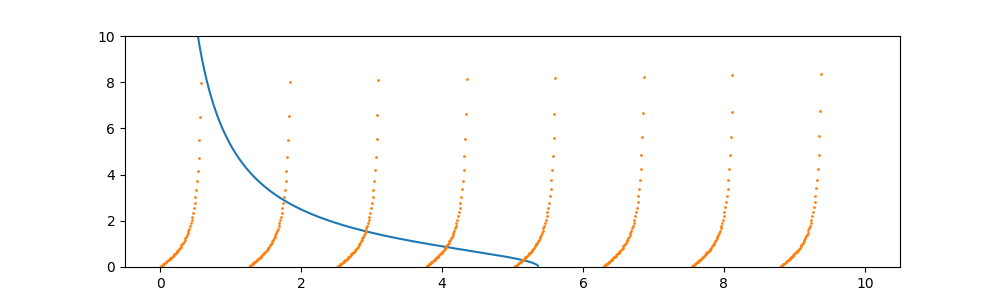

In [7]:
n1, n2, d = 2, 1, 5

m = 2
ky = np.linspace(0, 10, 900)

f1 = lambda w: np.sqrt((w / ky)**2 * (n1**2 - n2**2) - 1)
f2 = np.tan(ky * d / 2 + m * np.pi / 2)

fig, ax = plt.subplots(1, figsize=(10, 3))
ax.set_ylim(0, 10)
line1, = ax.plot(ky, f1(3.1))
line2, = ax.plot(ky, f2, marker="o", ms=1, lw=0)

@interact(w=(0.01, 9, 0.01))
def time_evol(w=3.1):
    line1.set_ydata(f1(w))

C:\Users\10921\AppData\Local\Temp\ipykernel_13724\384855618.py:5: RuntimeWarning: invalid value encountered in sqrt
  ky = lambda w: np.sqrt(w**2 * n1**2 - kp**2)
C:\Users\10921\AppData\Local\Temp\ipykernel_13724\384855618.py:7: RuntimeWarning: invalid value encountered in sqrt
  f1 = lambda w: np.sqrt((w / ky(w))**2 * (n1**2 - n2**2) - 1)


interactive(children=(FloatSlider(value=1.5, description='w', max=9.0, min=0.01, step=0.01), Output()), _dom_c…

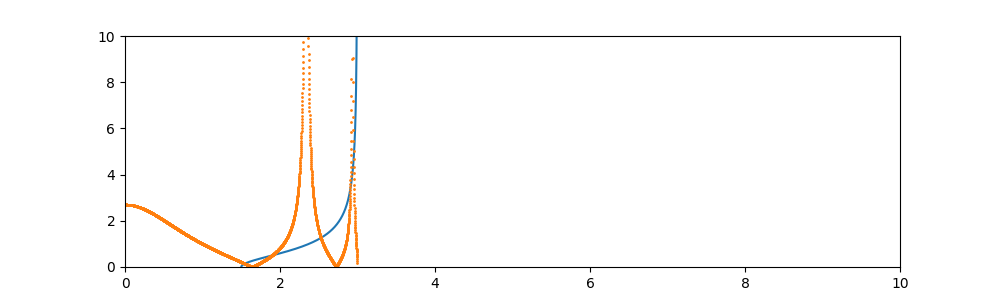

In [32]:
n1, n2, d = 2, 1, 5

m = 0
kp = np.linspace(0, 10, 9000)
ky = lambda w: np.sqrt(w**2 * n1**2 - kp**2)

f1 = lambda w: np.sqrt((w / ky(w))**2 * (n1**2 - n2**2) - 1)
f2 = lambda w: np.abs(np.tan(ky(w) * d / 2 + m * np.pi / 2))

fig, ax = plt.subplots(1, figsize=(10, 3))
ax.set_ylim(0, 10)
ax.set_xlim(0, 10)
line1, = ax.plot(kp, f1(3.1))
line2, = ax.plot(kp, f2(3.1), marker="o", ms=1, lw=0)

@interact(w=(0.01, 9, 0.01))
def time_evol(w=1.5):
    line1.set_ydata(f1(w))
    line2.set_ydata(f2(w))

In [33]:
def f_even(kp, w):
    return ((np.sqrt(kp**2 - w**2 * n2**2) / (w**2 * n1**2 - kp**2)
        - np.tan(np.sqrt(w**2 * n1**2 - kp**2) * d / 2 + 0*np.pi/2)) 
        * (np.tan(np.sqrt(w**2 * n1**2 - kp**2) * d / 2 + 0*np.pi/2) > 0) )


C:\Users\10921\AppData\Local\Temp\ipykernel_13724\2387654925.py:4: RuntimeWarning: invalid value encountered in sqrt
  return ((np.sqrt(kp**2 - w**2 * n2**2) / (w**2 * n1**2 - kp**2)
C:\Users\10921\AppData\Local\Temp\ipykernel_13724\2387654925.py:4: RuntimeWarning: divide by zero encountered in divide
  return ((np.sqrt(kp**2 - w**2 * n2**2) / (w**2 * n1**2 - kp**2)
C:\Users\10921\AppData\Local\Temp\ipykernel_13724\2387654925.py:4: RuntimeWarning: invalid value encountered in divide
  return ((np.sqrt(kp**2 - w**2 * n2**2) / (w**2 * n1**2 - kp**2)
C:\Users\10921\AppData\Local\Temp\ipykernel_13724\2387654925.py:5: RuntimeWarning: invalid value encountered in sqrt
  - np.tan(np.sqrt(w**2 * n1**2 - kp**2) * d / 2 + 0*np.pi/2))
C:\Users\10921\AppData\Local\Temp\ipykernel_13724\2387654925.py:6: RuntimeWarning: invalid value encountered in sqrt
  * (np.tan(np.sqrt(w**2 * n1**2 - kp**2) * d / 2 + 0*np.pi/2) > 0) )
C:\Users\10921\AppData\Local\Temp\ipykernel_13724\2387654925.py:4: RuntimeWarni

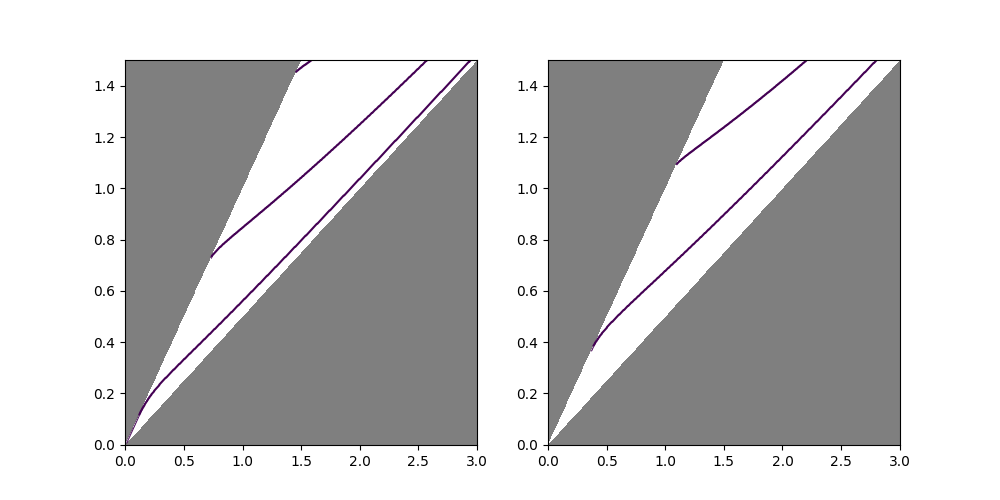

In [54]:
n1, n2, d = 2, 1, 5

def f_even(w, kp):
    return ((np.sqrt(kp**2 - w**2 * n2**2) / (w**2 * n1**2 - kp**2)
        - np.tan(np.sqrt(w**2 * n1**2 - kp**2) * d / 2 + 0*np.pi/2)) 
        * (np.tan(np.sqrt(w**2 * n1**2 - kp**2) * d / 2 + 0*np.pi/2) > 0) )

def f_odd(w, kp):
    return ((np.sqrt(kp**2 - w**2 * n2**2) / (w**2 * n1**2 - kp**2)
        - np.tan(np.sqrt(w**2 * n1**2 - kp**2) * d / 2 + 1*np.pi/2)) 
        * (np.tan(np.sqrt(w**2 * n1**2 - kp**2) * d / 2 + 1*np.pi/2) > 0) )

ws = np.linspace(0, 1.5, 750).reshape(-1, 1)
kps = np.linspace(0, 3, 750).reshape(1, -1)

# allowed region
r1 = kps <= ws * n1
r2 = kps >= ws * n2
r = r1 * r2

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pcolormesh(kps, ws, 1-r, alpha=0.5, cmap="Grays")
axs[1].pcolormesh(kps, ws, 1-r, alpha=0.5, cmap="Grays")
axs[0].contour(kps[0, :], ws[:, 0], f_even(ws, kps) / np.abs(f_even(ws, kps)), [0])
axs[1].contour(kps[0, :], ws[:, 0], f_odd(ws, kps) / np.abs(f_odd(ws, kps)), [0])